In [3]:
import pandas as pd
import numpy as np
import re
import string
from IPython.display import display
from nltk.stem import PorterStemmer

from scipy import stats

import statsmodels.api as sm
import matplotlib.pyplot as plt

RANDOM_SEED = 42
from sklearn.model_selection import train_test_split
np.random.seed(RANDOM_SEED)

from sklearn.metrics import explained_variance_score

In [4]:
PETR4_raw = pd.read_excel (r'PETR4.SA .xltx')

GOLD_raw = pd.read_excel (r'Gold Futures Historical Data.xltx') 
RDS_raw = pd.read_excel (r'RDS-A.xltx') 
OIL_raw = pd.read_excel (r'Crude Oil WTI Futures Historical Data.xltx')
CRD_raw = pd.read_excel (r'USD_BRL Dados Históricos.xltx')

In [5]:
from datetime import datetime
str_date = '06.11.2019'
def padronizaDia(str_date):
    date = datetime.strptime(str_date, '%d.%m.%Y').date()
    if len(str(date.day))==1:
        dia = "0" + str(date.day)
    else:
        dia = str(date.day)
        
    if len(str(date.month))==1:
        mes = "0" + str(date.month)
    else:
        mes = str(date.month)
    return "{0}-{1}-{2}".format(date.year,mes, dia)

In [6]:
PETR4_raw2 = PETR4_raw[['Date', 'Adj Close']]

GOLD_raw2 = GOLD_raw[['Date', 'Price']]
RDS_raw2 = RDS_raw[['Date', 'Adj Close']]
OIL_raw2 = OIL_raw[['Date', 'Price']]
CRD_raw2 = CRD_raw[['Data', 'Último']]


In [7]:
#Tabela da PTR4
lista_TX = []
for e in PETR4_raw2['Adj Close']:
    lista_TX.append(e)
    
lista_tx = []
lista_p = []
i = 0
while i < len(lista_TX)-1:
    var = lista_TX[i+1] - lista_TX[i]
    lista_tx.append(var)
    p = var*100/lista_TX[i]
    lista_p.append(p)
    i+=1
lista_tx

PETR4_r =PETR4_raw2.iloc[0:1243:1] 
PETR4_r['variacao_PETR4'] = lista_tx
PETR4_r['variacao percentual_PETR4'] = lista_p

PETR4 = PETR4_r.rename(columns={"Adj Close": "Valor_PETR4"})

PETR4.head()

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Valor_PETR4,variacao_PETR4,variacao percentual_PETR4
0,2014-11-05,13.634769,-0.321929,-2.361089
1,2014-11-06,13.312840,0.198840,1.493596
2,2014-11-07,13.511680,-0.274591,-2.032249
3,2014-11-10,13.237089,0.018937,0.143060
4,2014-11-11,13.256026,0.104155,0.785718


In [8]:
lista_TX = []
for e in GOLD_raw2['Price']:
    lista_TX.append(e)
    
lista_tx = []
lista_p = []
i = 0
while i < len(lista_TX)-1:
    var = lista_TX[i+1] - lista_TX[i]
    lista_tx.append(var)
    p = var*100/lista_TX[i]
    lista_p.append(p)
    i+=1
    
GOLD_r =GOLD_raw2.iloc[0:1345:1] 
GOLD_r['variacao_OURO'] = lista_tx
GOLD_r['variacao percentual_OURO'] = lista_p

GOLD = GOLD_r.rename(columns={"Price": "Valor_OURO"})

GOLD.head()

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Valor_OURO,variacao_OURO,variacao percentual_OURO
0,2019-11-07,1485.45,7.65,0.514995
1,2019-11-06,1493.10,-9.40,-0.629563
2,2019-11-05,1483.70,27.40,1.846735
3,2019-11-04,1511.10,0.30,0.019853
4,2019-11-01,1511.40,3.40,0.224957


In [9]:
lista_TX = []
for e in RDS_raw2['Adj Close']:
    lista_TX.append(e)
    
lista_tx = []
lista_p = []
i = 0
while i < len(lista_TX)-1:
    var = lista_TX[i+1] - lista_TX[i]
    lista_tx.append(var)
    p = var*100/lista_TX[i]
    lista_p.append(p)
    i+=1

RDS_r =RDS_raw2.iloc[0:1257:1] 
RDS_r['variacao_RDS'] = lista_tx
RDS_r['variacao percentual_RDS'] = lista_p

RDS = RDS_r.rename(columns={"Adj Close": "Valor_RDS"})

RDS.head()

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Valor_RDS,variacao_RDS,variacao percentual_RDS
0,2014-11-07,51.391106,-0.209904,-0.408444
1,2014-11-10,51.181202,0.296768,0.579838
2,2014-11-11,51.477970,-0.946236,-1.838138
3,2014-11-12,50.531734,-0.352081,-0.696752
4,2014-11-13,50.179653,0.711506,1.417917


In [10]:
lista_TX = []
for e in OIL_raw2['Price']:
    lista_TX.append(e)
    
lista_tx = []
lista_p = []
i = 0
while i < len(lista_TX)-1:
    var = lista_TX[i+1] - lista_TX[i]
    lista_tx.append(var)
    p = var*100/lista_TX[i]
    lista_p.append(p)
    i+=1

OIL_r =OIL_raw2.iloc[0:1342:1] 
OIL_r['variacao_OIL'] = lista_tx
OIL_r['variacao percentual_OIL'] = lista_p

OIL = OIL_r.rename(columns={"Price": "Valor_OIL"})

OIL.head()

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Valor_OIL,variacao_OIL,variacao percentual_OIL
0,2019-11-07,57.11,-0.76,-1.330765
1,2019-11-06,56.35,0.88,1.561668
2,2019-11-05,57.23,-0.69,-1.205661
3,2019-11-04,56.54,-0.34,-0.601344
4,2019-11-01,56.20,-2.02,-3.594306


In [11]:
lista_TX = []
for e in CRD_raw2['Último']:
    i = e/10000
    lista_TX.append(i)
    
lista_tx = []
lista_p = []
i = 0
while i < len(lista_TX)-1:
    var = lista_TX[i+1] - lista_TX[i]
    lista_tx.append(var)
    p = var*100/lista_TX[i]
    lista_p.append(p)
    i+=1

CRD_r =CRD_raw2.iloc[0:1326:1] 
CRD_r['variacao_CRD'] = lista_tx
CRD_r['variacao percentual_CRD'] = lista_p

CRD = CRD_r.rename(columns={"Último": "Valor_CRD"})

CRD['Valor_CRD'] = CRD['Valor_CRD']/10000

CRD.head()

C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Tonera\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Data,Valor_CRD,variacao_CRD,variacao percentual_CRD
0,06.11.2019,4.0837,-0.0900,-2.203884
1,05.11.2019,3.9937,0.0219,0.548364
2,04.11.2019,4.0156,-0.0253,-0.630043
3,01.11.2019,3.9903,0.0281,0.704208
4,31.10.2019,4.0184,-0.0275,-0.684352


In [12]:
PETR4.set_index('Date', inplace = True)
GOLD.set_index('Date', inplace = True)
RDS.set_index('Date', inplace = True)
OIL.set_index('Date', inplace = True)


In [13]:
from datetime import datetime
str_date = '06.11.2019'
def padronizaDia(str_date):
    date = datetime.strptime(str_date, '%d.%m.%Y').date()
    if len(str(date.day))==1:
        dia = "0" + str(date.day)
    else:
        dia = str(date.day)
    return "{0}-{1}-{2}".format(date.year,date.month, dia)
    

In [14]:
CRD.head()

,Data,Valor_CRD,variacao_CRD,variacao percentual_CRD
0,06.11.2019,4.0837,-0.0900,-2.203884
1,05.11.2019,3.9937,0.0219,0.548364
2,04.11.2019,4.0156,-0.0253,-0.630043
3,01.11.2019,3.9903,0.0281,0.704208
4,31.10.2019,4.0184,-0.0275,-0.684352


In [15]:
CRD['Date'] = CRD.Data.apply(padronizaDia)
CRD.set_index('Date', inplace = True)

In [16]:
df = PETR4.join(CRD, how='inner', lsuffix='_PETR4', rsuffix='_CRD')
df.head()

,Valor_PETR4,variacao_PETR4,variacao percentual_PETR4,Data,Valor_CRD,variacao_CRD,variacao percentual_CRD
Date,,,,,,,
2014-11-05,13.634769,-0.321929,-2.361089,05.11.2014,2.5049,-0.0079,-0.315382
2014-11-06,13.312840,0.198840,1.493596,06.11.2014,2.5697,-0.0648,-2.521695
2014-11-07,13.511680,-0.274591,-2.032249,07.11.2014,2.5587,0.0110,0.429906
2014-11-10,13.237089,0.018937,0.143060,10.11.2014,2.5528,0.0059,0.231119
2014-11-11,13.256026,0.104155,0.785718,11.11.2014,2.5575,-0.0047,-0.183773


In [17]:
df.drop(['Data'], axis=1, inplace = True)

In [18]:
df = df.join(GOLD, how = 'inner', rsuffix='_GOLD')

In [19]:
df = df.join(RDS, how = 'inner', rsuffix = '_RDS')

In [20]:
DataFrame = df.join(OIL, how = 'inner', rsuffix = '_OIL')
DataFrame.head()

,Valor_PETR4,variacao_PETR4,variacao percentual_PETR4,Valor_CRD,variacao_CRD,variacao percentual_CRD,Valor_OURO,variacao_OURO,variacao percentual_OURO,Valor_RDS,variacao_RDS,variacao percentual_RDS,Valor_OIL,variacao_OIL,variacao percentual_OIL
Date,,,,,,,,,,,,,,,
2014-11-07,13.511680,-0.274591,-2.032249,2.5587,0.0110,0.429906,1261.0,-26.6,-2.109437,51.391106,-0.209904,-0.408444,78.65,-0.74,-0.940877
2014-11-10,13.237089,0.018937,0.143060,2.5528,0.0059,0.231119,1251.3,9.7,0.775194,51.181202,0.296768,0.579838,77.40,1.25,1.614987
2014-11-11,13.256026,0.104155,0.785718,2.5575,-0.0047,-0.183773,1255.1,-3.8,-0.302765,51.477970,-0.946236,-1.838138,77.94,-0.54,-0.692841
2014-11-12,13.360181,-0.482898,-3.614457,2.5665,-0.0090,-0.350672,1250.4,4.7,0.375880,50.531734,-0.352081,-0.696752,77.18,0.76,0.984711
2014-11-13,12.877283,-0.378742,-2.941164,2.5889,-0.0224,-0.865232,1251.4,-1.0,-0.079911,50.179653,0.711506,1.417917,74.21,2.97,4.002156


## Criando as bases de teste e treinamento

In [21]:
# Valores absolutos
Y_valor = DataFrame['Valor_PETR4']
X_valor = DataFrame[['Valor_CRD', 'Valor_OURO','Valor_RDS','Valor_OIL']]

In [22]:
X_train_valor, X_test_valor, Y_train_valor, Y_test_valor = train_test_split(X_valor, Y_valor, test_size=0.2, random_state=RANDOM_SEED)

In [23]:
#Variação percentual
Y_vp = DataFrame['variacao percentual_PETR4']
X_vp = DataFrame[['variacao percentual_CRD', 'variacao percentual_OURO', 'variacao percentual_RDS', 'variacao percentual_OIL']]

In [24]:
X_train_vp, X_test_vp, Y_train_vp, Y_test_vp = train_test_split(X_vp, Y_vp, test_size=0.2, random_state=RANDOM_SEED)

## Início da Regressão

Com os valores absolutos (valores de cada ação)

In [25]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [26]:
np.sum(DataFrame.isnull())

Valor_PETR4                  0
variacao_PETR4               0
variacao percentual_PETR4    0
Valor_CRD                    0
variacao_CRD                 0
variacao percentual_CRD      0
Valor_OURO                   0
variacao_OURO                0
variacao percentual_OURO     0
Valor_RDS                    0
variacao_RDS                 0
variacao percentual_RDS      0
Valor_OIL                    0
variacao_OIL                 0
variacao percentual_OIL      0
dtype: int64

In [27]:
results1 = regress(X_train_valor, Y_train_valor)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Valor_PETR4   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     883.6
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          2.81e-320
Time:                        08:38:45   Log-Likelihood:                -2467.7
No. Observations:                 967   AIC:                             4945.
Df Residuals:                     962   BIC:                             4970.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0963      2.087    -24.008      0.000     -54.191     -46.001
Valor_CRD      4.3197      0.294     14.680      0.000       3.742       4.897
Valor_OURO     0.0206      0.001     14.310      0.000       0.018       0.023
Valor_RDS      0.4578      0.025     18.137      0.000       0.408       0.507
Valor_OIL      0.0122      0.020      0.598      0.550      -0.028       0.052
==============================================================================
Omnibus:                        8.813   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.820
Skew:                          -0.215   Prob(JB):                       0.0122
Kurtosis:                       2.814   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Adicionando uma coluna p equivaler a função regress
X_test_valor_n = sm.add_constant(X_test_valor)

# Teste do modelo
y_pred_valor = results1.predict(X_test_valor_n)


In [29]:
Y_test_valor

Date
2015-04-13    11.617962
2016-08-23    11.996705
2016-02-25     4.630141
2015-04-24    12.517478
2018-12-27    21.404846
2018-09-25    19.098606
2015-10-22     7.593810
2015-01-26     9.307625
2018-02-01    19.429546
2017-12-05    14.496412
2018-07-23    18.272978
2017-03-20    12.877283
2015-07-02    11.693710
2017-03-07    14.373322
2018-07-02    16.574709
2015-03-10     8.067240
2015-12-21     6.287145
2015-09-18     7.196129
2015-11-11     7.309752
2018-08-24    17.405603
2015-05-22    12.375447
2018-06-29    16.309063
2019-04-18    27.262287
2016-05-19     8.483858
2017-11-21    15.055059
2018-03-07    20.518436
2015-07-31     9.932552
2016-07-21    11.220280
2017-04-12    13.871486
2017-02-24    14.373322
                ...    
2016-11-11    13.265495
2015-10-06     7.754776
2016-04-28     9.686367
2017-01-13    14.846750
2014-11-24    13.454869
2016-11-30    15.149745
2017-11-14    14.534287
2016-01-22     4.175649
2015-02-09     8.900475
2017-03-23    12.848877
2015-02-13 

In [30]:
# Acurácia do modelo
lista_pred = []
lista_Y_valor = []
acertos = 0


for e in y_pred_valor:
    lista_pred.append(e)
    
for e in Y_test_valor:
    lista_Y_valor.append(e)

# 
i = 0
while i < len(lista_pred):
    a = lista_Y_valor[i]*1.05
    b = lista_Y_valor[i]*0.95
    print(a, " - ",b)
    print(lista_pred[i])
    if lista_pred[i] < a and lista_pred[i] > b:
        acertos += 1
    i += 1
        
acc = acertos/len(lista_Y_valor)

acertos

12.198860100000001  -  11.0370639
10.257790361154518
12.59654025  -  11.39686975
12.14027438279206
4.86164805  -  4.39863395
9.869855637533325
13.1433519  -  11.8916041
10.033839076915836
22.4750883  -  20.3346037
19.44196986092964
20.0535363  -  18.1436757
23.880168903403007
7.973500500000001  -  7.2141195
11.585889928940217
9.77300625  -  8.84224375
11.623604082367086
20.4010233  -  18.4580687
22.012530524594045
15.2212326  -  13.771591399999998
18.103572350891866
19.1866269  -  17.359329099999997
22.68671365960278
13.521147150000001  -  12.23341885
11.025705998403087
12.2783955  -  11.109024499999999
9.026122182426707
15.0919881  -  13.6546559
10.90267674488289
17.40344445  -  15.745973549999999
23.279835103238078
8.470602  -  7.6638779999999995
9.155780499265841
6.60150225  -  5.972787749999999
6.344673813048807
7.555935450000001  -  6.836322549999999
9.313023660346472
7.6752396  -  6.944264399999999
7.640998622026022
18.27588315  -  16.53532285
22.3856908749924
12.99421935  -  11.

28

In [31]:
#Teste da variação prevista com o valor absoluto

explained_variance_score(Y_test_valor, y_pred_valor, multioutput='uniform_average')

0.7865198282921733

Regressão com as taxas de variação

In [32]:
results_vp = regress(X_train_vp, Y_train_vp)
results_vp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     variacao percentual_PETR4   R-squared:                       0.215
Model:                                   OLS   Adj. R-squared:                  0.211
Method:                        Least Squares   F-statistic:                     65.77
Date:                       Thu, 21 Nov 2019   Prob (F-statistic):           3.27e-49
Time:                               08:38:46   Log-Likelihood:                -2361.3
No. Observations:                        967   AIC:                             4733.
Df Residuals:                            962   BIC:                             4757.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1600      0.091      1.766      0.078      -0.018       0.338
variacao percentual_CRD     -0.0617      0.086     -0.717      0.473      -0.230       0.107
variacao percentual_OURO     0.1188      0.088      1.345      0.179      -0.055       0.292
variacao percentual_RDS      0.9835      0.062     15.976      0.000       0.863       1.104
variacao percentual_OIL      0.0586      0.039      1.485      0.138      -0.019       0.136
==============================================================================
Omnibus:                      108.788   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.314
Skew:                          -0.242   Prob(JB):                    7.06e-159
Kurtosis:                       7.224   Cond. No.                         2.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Testando o algoritmo das variações percentuais

In [33]:
# Adicionando uma coluna p equivaler a função regress
X_test_vp_n = sm.add_constant(X_test_vp)

# Teste do modelo
y_pred_vp = results_vp.predict(X_test_vp_n)

In [34]:
# Acurácia do modelo
lista_pred_vp = []
lista_Y_vp = []
acertos = 0


for e in y_pred_vp:
    lista_pred_vp.append(e)
    
for e in Y_test_vp:
    lista_Y_vp.append(e)

# 
i = 0
while i < len(lista_pred_vp):
    a = lista_Y_vp[i]*1.5
    b = lista_Y_vp[i]*0.5
    print(a, " - ",b)
    print(lista_pred_vp[i])
    if lista_pred_vp[i] < a and lista_pred_vp[i] > b:
        acertos += 1
    i += 1
        
acc = acertos/len(lista_Y_vp)

print(acertos)
acc

2.322735261141319  -  0.7742450870471064
1.3405736235124555
-3.1965277132345866  -  -1.0655092377448623
-0.6749341030715283
-0.6134910362341084  -  -0.2044970120780361
1.018742118108821
-7.94253043624283  -  -2.6475101454142766
0.9066700076335263
6.9912416094934775  -  2.330413869831159
0.7475363143546577
0.821714422508123  -  0.2739048075027077
-0.8789267718264966
-0.5611214923734037  -  -0.18704049745780124
-1.6596732739163693
4.730411893474436  -  1.5768039644914786
0.6873759545184956
-4.020456782675209  -  -1.3401522608917364
-3.086641434858461
2.0574849831806636  -  0.685828327726888
-0.4964622133738349
3.1152639706565717  -  1.0384213235521906
1.6104555487719716
-6.617642091115035  -  -2.205880697038345
0.7569508779592993
-7.1660063401606475  -  -2.3886687800535493
-1.499111703476518
-6.2253040737555345  -  -2.0751013579185114
-2.4068418350443883
0.2576063326360719  -  0.0858687775453573
1.066540791208315
3.873220581016567  -  1.2910735270055225
-0.6314754182571409
3.388533269075

0.11570247933884298

In [35]:
#Teste da variação prevista com a variação percentual

explained_variance_score(Y_test_vp, y_pred_vp, multioutput='uniform_average')

0.2715196336958108

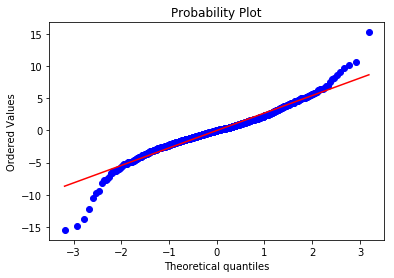

In [36]:
stats.probplot(results_vp.resid, dist="norm", plot=plt);

### Removendo CRD (variação percentual)

In [37]:
#Variação percentual
Y_vp = DataFrame['variacao percentual_PETR4']
X_vp = DataFrame[['variacao percentual_OURO', 'variacao percentual_RDS', 'variacao percentual_OIL']]

X_train_vp, X_test_vp, Y_train_vp, Y_test_vp = train_test_split(X_vp, Y_vp, test_size=0.2, random_state=RANDOM_SEED)

In [38]:
results2 = regress(X_train_vp, Y_train_vp)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     variacao percentual_PETR4   R-squared:                       0.214
Model:                                   OLS   Adj. R-squared:                  0.212
Method:                        Least Squares   F-statistic:                     87.57
Date:                       Thu, 21 Nov 2019   Prob (F-statistic):           4.14e-50
Time:                               08:38:47   Log-Likelihood:                -2361.6
No. Observations:                        967   AIC:                             4731.
Df Residuals:                            963   BIC:                             4751.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1604      0.091      1.771      0.077      -0.017       0.338
variacao percentual_OURO     0.1244      0.088      1.414      0.158      -0.048       0.297
variacao percentual_RDS      0.9822      0.062     15.966      0.000       0.862       1.103
variacao percentual_OIL      0.0648      0.039      1.684      0.093      -0.011       0.140
==============================================================================
Omnibus:                      107.991   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.438
Skew:                          -0.243   Prob(JB):                    1.20e-155
Kurtosis:                       7.180   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Adicionando uma coluna p equivaler a função regress
X_test_vp_n = sm.add_constant(X_test_vp)

# Teste do modelo
y_pred_vp = results2.predict(X_test_vp_n)


# Acurácia do modelo
lista_pred_vp = []
lista_Y_vp = []
acertos = 0


for e in y_pred_vp:
    lista_pred_vp.append(e)
    
for e in Y_test_vp:
    lista_Y_vp.append(e)

# 
i = 0
while i < len(lista_pred_vp):
    a = lista_Y_vp[i]*1.5
    b = lista_Y_vp[i]*0.5
    print(a, " - ",b)
    print(lista_pred_vp[i])
    if lista_pred_vp[i] < a and lista_pred_vp[i] > b:
        acertos += 1
    i += 1
        
acc = acertos/len(lista_Y_vp)

acertos
acc

print(acertos)

2.322735261141319  -  0.7742450870471064
1.248720799497213
-3.1965277132345866  -  -1.0655092377448623
-0.7500025996462655
-0.6134910362341084  -  -0.2044970120780361
1.0054812140763483
-7.94253043624283  -  -2.6475101454142766
0.9623918767800448
6.9912416094934775  -  2.330413869831159
0.8433822467892208
0.821714422508123  -  0.2739048075027077
-0.8534879406055753
-0.5611214923734037  -  -0.18704049745780124
-1.6074764171046303
4.730411893474436  -  1.5768039644914786
0.6892959197982874
-4.020456782675209  -  -1.3401522608917364
-3.057462652937815
2.0574849831806636  -  0.685828327726888
-0.4866693106579054
3.1152639706565717  -  1.0384213235521906
1.6119201890884434
-6.617642091115035  -  -2.205880697038345
0.8007819425200401
-7.1660063401606475  -  -2.3886687800535493
-1.387377201532184
-6.2253040737555345  -  -2.0751013579185114
-2.3604602623035764
0.2576063326360719  -  0.0858687775453573
1.017456121748055
3.873220581016567  -  1.2910735270055225
-0.5633050862667281
3.388533269075

### Análise da influência dos fatores

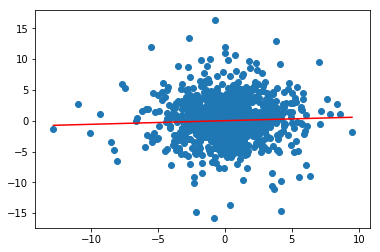

In [40]:
#Influência do preço do óleo

k = results_vp.params['const']
PO = results_vp.params['variacao percentual_OIL']

x = DataFrame['variacao percentual_OIL']

x_v = np.linspace(x.min(), x.max(), 500)
y_v = PO*x_v

plt.plot(x_v,y_v, color="r") 
plt.scatter(x, Y_vp)

Correlação: 0.604599163790068


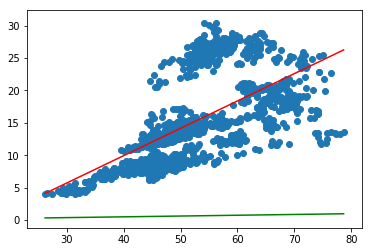

In [69]:
PO = results1.params['Valor_OIL']

x = DataFrame['Valor_OIL']

x_v = np.linspace(x.min(), x.max(), 500)
y_v = PO*x_v

c = DataFrame.Valor_OIL.corr(DataFrame.Valor_PETR4)

a = DataFrame.Valor_OIL.cov(DataFrame.Valor_PETR4) / DataFrame.Valor_OIL.var()
b = DataFrame.Valor_PETR4.mean() - a*DataFrame.Valor_OIL.mean()

plt.plot((DataFrame.Valor_OIL.min(), DataFrame.Valor_OIL.max()), (a*DataFrame.Valor_OIL.min()+b, a*DataFrame.Valor_OIL.max()+b), color='r')

plt.plot(x_v,y_v, color="green") 
plt.scatter(x, Y_valor)
print('Correlação: {0}'.format(c))

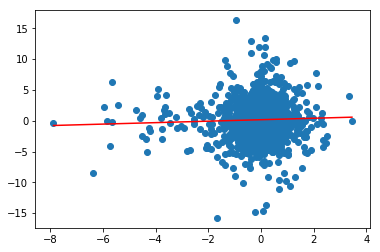

In [42]:
#Influencia do Ouro 

PG = results_vp.params['variacao percentual_OURO']
x2 = DataFrame['variacao percentual_OURO']

x_v2 = np.linspace(x2.min(), x2.max(), 500)
y_v2 = k + PG*x_v2

plt.plot(x_v2,y_v2, color="r") 
plt.scatter(x2, Y_vp)

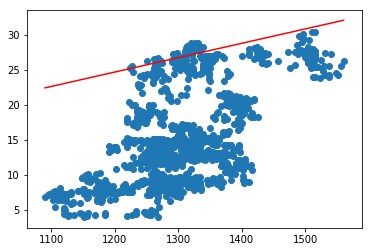

In [55]:
PG = results1.params['Valor_OURO']
x2 = DataFrame['Valor_OURO']

x_v2 = np.linspace(x2.min(), x2.max(), 500)
y_v2 = PG*x_v2

plt.plot(x_v2,y_v2, color="r") 
plt.scatter(x2, Y_valor)

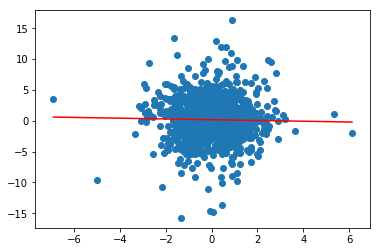

In [43]:
# Interferencia do dolar

PD = results_vp.params['variacao percentual_CRD']
x3 = DataFrame['variacao percentual_CRD']

x_v3 = np.linspace(x3.min(), x3.max(), 500)
y_v3 = k + PD*x_v3

plt.plot(x_v3,y_v3, color="r") 
plt.scatter(x3, Y_vp)

In [ ]:
PD = results1.params['Valor_CRD']
x3 = DataFrame['Valor_CRD']

x_v3 = np.linspace(x3.min(), x3.max(), 500)
y_v3 = k + PD*x_v3

plt.plot(x_v3,y_v3, color="r") 
plt.scatter(x3, Y_vp)

## Plotagem dos Histogramas 

In [44]:
lista_var = []
for e in DataFrame['variacao_PETR4']:
    lista_var.append(e)
    
i = 0
lista_pos = []
while i < len(lista_var):
    if lista_var[i] > 0:
        lista_pos.append('UP')
    else:
        lista_pos.append('DOWN')
    i+=1

DataFrame['Posicao'] = lista_pos

DataFrame.head()

,Valor_PETR4,variacao_PETR4,variacao percentual_PETR4,Valor_CRD,variacao_CRD,variacao percentual_CRD,Valor_OURO,variacao_OURO,variacao percentual_OURO,Valor_RDS,variacao_RDS,variacao percentual_RDS,Valor_OIL,variacao_OIL,variacao percentual_OIL,Posicao
Date,,,,,,,,,,,,,,,,
2014-11-07,13.511680,-0.274591,-2.032249,2.5587,0.0110,0.429906,1261.0,-26.6,-2.109437,51.391106,-0.209904,-0.408444,78.65,-0.74,-0.940877,DOWN
2014-11-10,13.237089,0.018937,0.143060,2.5528,0.0059,0.231119,1251.3,9.7,0.775194,51.181202,0.296768,0.579838,77.40,1.25,1.614987,UP
2014-11-11,13.256026,0.104155,0.785718,2.5575,-0.0047,-0.183773,1255.1,-3.8,-0.302765,51.477970,-0.946236,-1.838138,77.94,-0.54,-0.692841,UP
2014-11-12,13.360181,-0.482898,-3.614457,2.5665,-0.0090,-0.350672,1250.4,4.7,0.375880,50.531734,-0.352081,-0.696752,77.18,0.76,0.984711,DOWN
2014-11-13,12.877283,-0.378742,-2.941164,2.5889,-0.0224,-0.865232,1251.4,-1.0,-0.079911,50.179653,0.711506,1.417917,74.21,2.97,4.002156,DOWN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF2254B198>,
      dtype=object)

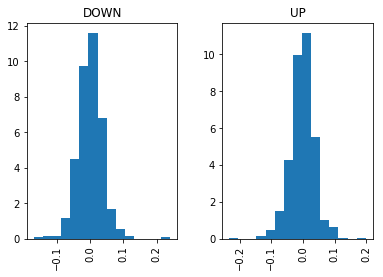

In [59]:
h1 = DataFrame.hist(column = 'variacao_CRD', by = 'Posicao', bins = 15, density = True)
h1

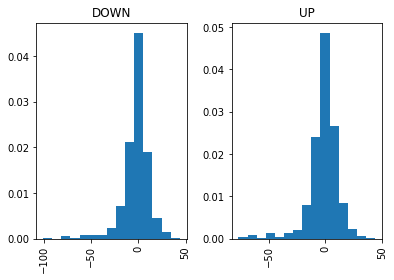

In [58]:
h2 = DataFrame.hist(column = 'variacao_OURO', by = 'Posicao', bins = 15, density = True)

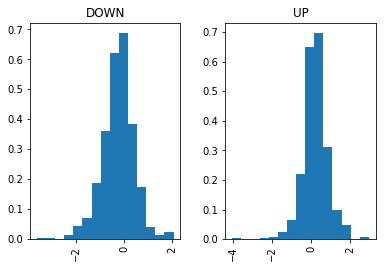

In [60]:
h3 = DataFrame.hist(column = 'variacao_RDS', by = 'Posicao', bins = 15, density = True)

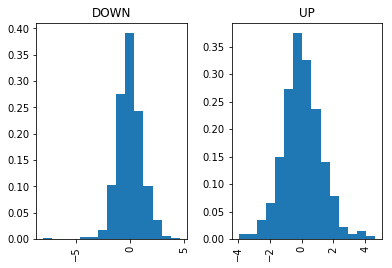

In [61]:
h4 = DataFrame.hist(column = 'variacao_OIL', by = 'Posicao', bins = 15, density = True)

## Análise por  meio da ARIMA

In [75]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = DataFrame['variacao percentual_PETR4']
# fit model
model = ARIMA(data, order=(7, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(0, len(data), typ='levels')
print(yhat)

C:\Users\Tonera\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Tonera\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The start index -1 of the original series  has been differenced away

In [71]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = DataFrame['Valor_PETR4']
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

C:\Users\Tonera\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Tonera\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.